<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Estimacion_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimación de Pi**

Consideremos que lanzamos $N$ dardos sobre un cuadrado unitario con una esquina en el origen del sistema cartesiano y ubicado en el primer cuadrante, de manera uniforme. En éste cuadrado está inscrito un cuarto de círculo de radio igual a 1.

Sabemos que el área del cuadrado es 1, mientras que la del círculo es $\frac π4$. Por lo tanto, si los dardos se lanzan de manera uniforme, el número de dardos $n$ que caen dentro del círculo, para $N$ grande, será al número total de dardos, aproximadamente, como el área del círculo $\frac π4$ es el área del cuadrado, que es 1:

$\frac π4 ≈\frac nN$


In [13]:
#Clase Martes 11 de Junio
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [14]:
#Declaración de la función
def estimaciones(N):
  Lista=[] #Almacenaremos las probabilidades en cada iteración
  exitos=0 #Contador
  for i in range(N):
    x=np.linspace(0,1,100)
    u_1=random.uniform(0,1)
    u_2=random.uniform(0,1)
    plt.plot(x,np.sqrt(1-x**2))
    if u_2<np.sqrt(1-u_1**2): #El valor se encuentra dentro del arco
       plt.scatter(u_1,u_2,color="red")
       exitos+=1
       probabilidad=exitos/(i+1)
       Lista.append(probabilidad)
    else:
       plt.scatter(u_1,u_2,color="blue") #El valor se encuentra fuera del arco
  plt.show()
  estimacion=4*(exitos/N)
  print("La estimación es:",estimacion)
  return Lista

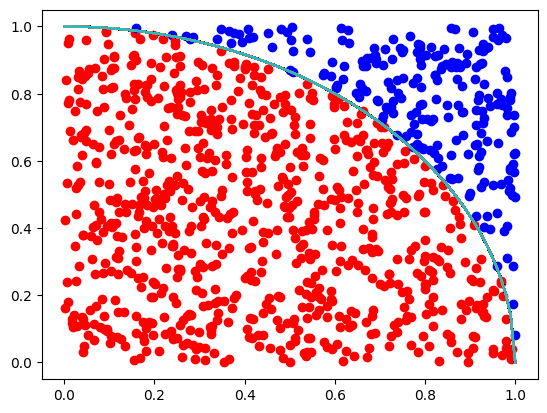

La estimación es: 3.1


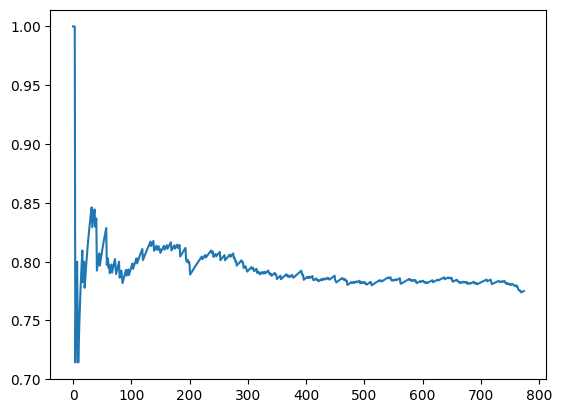

In [15]:
X=estimaciones(1000)
plt.plot(X) #Imprimos las probabilidades para ver cual es la N "correcta"

*Nota*

Se observa que conforme el número de dardos lanzados aumenta, el valor estimado se acerca cada vez más a π.

Si $X_N$ es la variable aleatoria que da el número de los $N$ dardos que caen dentro del círculo , entonces $X_N$ sigue una distribución Binomial con parametros $N$ Y $p=\frac π4$  

Luego la media de $X_N$ será la $\frac{πN}4$ y la varianza será $(\frac{Nπ}4)(\frac{1-π}4)$.

Y por lo tanto, la media y la varianza de la proporción de dardos que caen dentro del círculo serán $\fracπ4$ y $(\frac π{4N})(\frac{1-π}4)$, respectivamente.


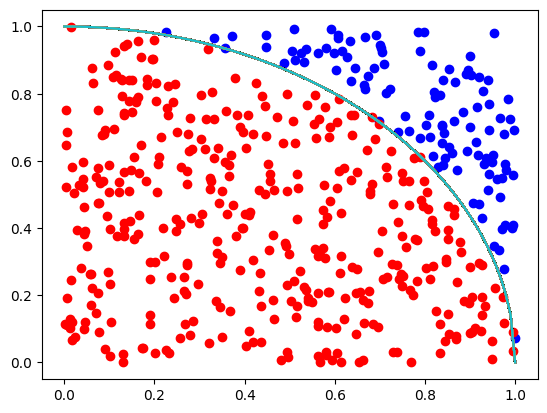

La estimación es: 3.112


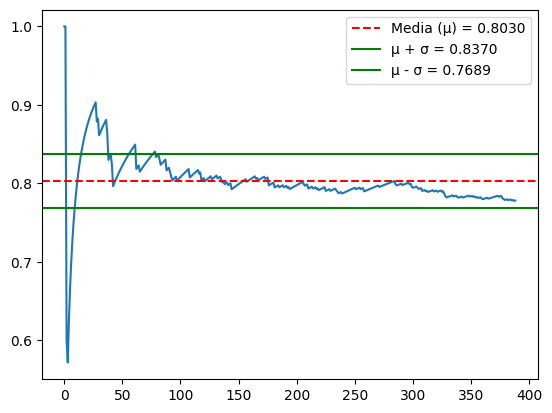

In [16]:
#Observamos que aproximadamente en 500 se consigue una buena aproximacion
X=estimaciones(500)
plt.plot(X)
media=np.mean(X)
desviacion_Est=np.std(X)
# Trazar una línea horizontal en la media
plt.axhline(y=media, color='r', linestyle='--', label=f'Media (µ) = {media:.4f}')
# Trazar líneas horizontales en µ+σ y µ-σ
plt.axhline(y=media + desviacion_Est, color='g',label=f'µ + σ = {media + desviacion_Est:.4f}')
plt.axhline(y=media - desviacion_Est, color='g',label=f'µ - σ = {media - desviacion_Est:.4f}')

plt.legend()


In [19]:
# Función de simulaciones
def simulaciones(M, N):
    estimaciones_pi = []
    for i in range(M):
        estimacion_pi, _ = estimacion(N)  # Obtenemos la estimación de Pi
        estimaciones_pi.append(estimacion_pi)
    return estimaciones_pi


In [20]:
# Realizamos las simulaciones
M = 1000
N = 500
estimacion=simulaciones(M, N)


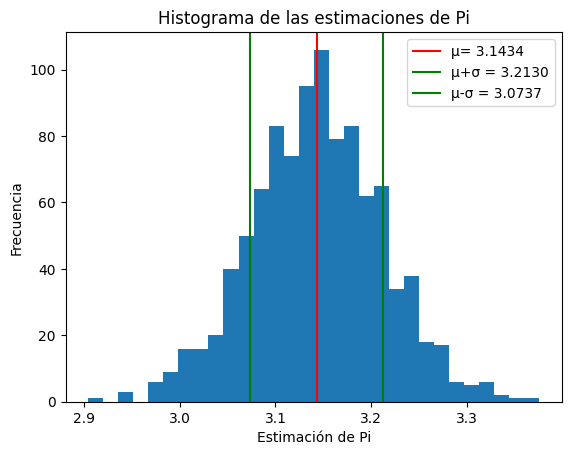

In [24]:
# Calculamos la media de las estimaciones de Pi realizadas en simulación
media_pi = np.mean(estimacion)
desviacion_estandar_pi = np.std(estimacion)

# Trazamos el histograma de los valores obtenidos
plt.hist(estimacion, bins=30)
plt.axvline(media_pi, color='r', label=f'μ= {media_pi:.4f}')
plt.axvline(media_pi + desviacion_estandar_pi, color='g',label=f'μ+σ = {media_pi + desviacion_estandar_pi:.4f}')
plt.axvline(media_pi - desviacion_estandar_pi, color='g',label=f'μ-σ = {media_pi - desviacion_estandar_pi:.4f}')
plt.xlabel('Estimación de Pi')
plt.ylabel('Frecuencia')
plt.title('Histograma de las estimaciones de Pi')
plt.legend()
plt.show()

